In [5]:
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Beachten beim Modellieren

- Niederschlag und seine Formen beachten
    - Schnee schmilzt und richten den schaden nicht imediatly an.
    

## Aufgaben bis nächste Woche ^hue

- Regenvorhersage für die nächsten 6h machen.
- Abfluss<>

# Sensor Data

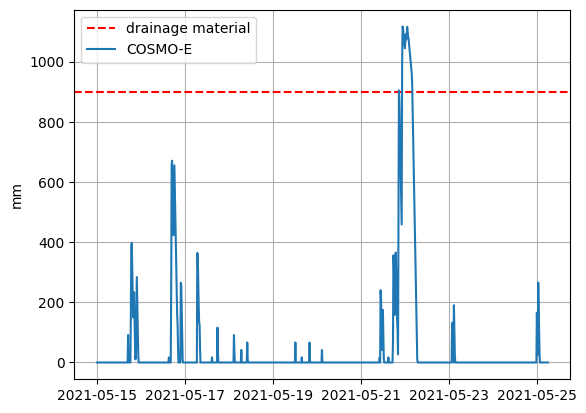

In [4]:
df_meas = pd.read_excel("../data/measuring_values_.xlsx")

df_meas["date_time"] = df_meas.apply(
    lambda x: dt.datetime(
        x["date"].year, x["date"].month, x["date"].day, x["time"].hour, x["time"].minute
    ),
    axis=1,
)
df_meas = df_meas.set_index("date_time")

df_meas = df_meas.drop(columns=["date", "time"])

plt.axhline(900, color="red", linestyle="--", label="drainage material")
plt.plot(df_meas["mm"], label="COSMO-E")
plt.legend()
plt.ylabel("mm")
plt.grid()

# Forecast Example Data

In [42]:
def read_comso_data(file_path: Path) -> pd.DataFrame:
    df = pd.read_csv(file_path, skiprows=24, sep=";").iloc[:, :-1]

    # KLO is the station name (Kloten (Zuerich))
    df = df[df["stn"] == "KLO"]
    df = df.drop(columns=["stn"])

    df["time"] = pd.to_datetime(df["time"])
    df = df.set_index("time")

    df["leadtime"] = df["leadtime"].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60)

    df = df[["leadtime", "TOT_PREC", "T_2M", "FF_10M", "DD_10M", "RELHUM_2M", "DURSUN"]]

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    
    df = df.replace(-999, np.nan)

    return df

In [44]:
df_forecasts_paths = list(Path("../data/comso_example").glob("*.csv"))

df_forecasts = [read_comso_data(p) for p in df_forecasts_paths]

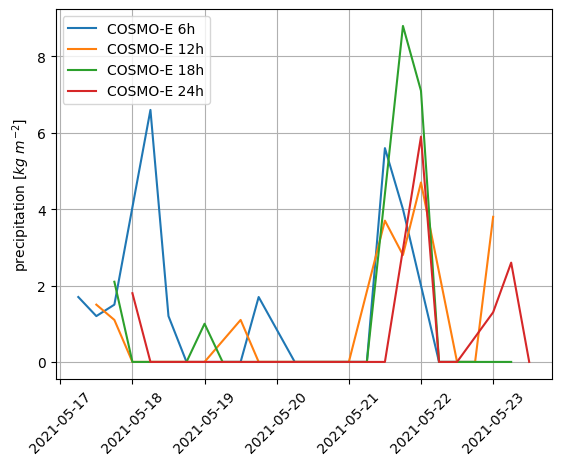

In [71]:
df_leadtime_6 = pd.concat([df[df["leadtime"] == 6] for df in df_forecasts])
df_leadtime_6.sort_index(inplace=True)
df_leadtime_12 = pd.concat([df[df["leadtime"] == 12] for df in df_forecasts])
df_leadtime_12.sort_index(inplace=True)
df_leadtime_18 = pd.concat([df[df["leadtime"] == 18] for df in df_forecasts])
df_leadtime_18.sort_index(inplace=True)
df_leadtime_24 = pd.concat([df[df["leadtime"] == 24] for df in df_forecasts])
df_leadtime_24.sort_index(inplace=True)

plt.plot(df_leadtime_6["TOT_PREC"], label="COSMO-E 6h")
plt.plot(df_leadtime_12["TOT_PREC"], label="COSMO-E 12h")
plt.plot(df_leadtime_18["TOT_PREC"], label="COSMO-E 18h")
plt.plot(df_leadtime_24["TOT_PREC"], label="COSMO-E 24h")
plt.ylabel(r"precipitation [$kg\ m^{-2}$]")
plt.xticks(rotation=45)
plt.grid()
plt.legend()